## Dataset

https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

## Libraries

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input   
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

## Dataset

## Preprocessing

In [7]:
data = []
labels = []

path = r"/content/drive/MyDrive/TARPfinal/with_mask"
for img in os.listdir(path):
    img_path = os.path.join(path, img)
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

    data.append(image)
    labels.append("with_mask")

path = r"/content/drive/MyDrive/TARPfinal/without_mask"
for img in os.listdir(path):
    img_path = os.path.join(path, img)
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

    data.append(image)
    labels.append("without_mask")

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [8]:
set(labels)

{'with_mask', 'without_mask'}

In [9]:
labels

['with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with

In [10]:
data

[array([[[ 0.17647064,  0.5921569 ,  0.85882354],
         [ 0.12156868,  0.54509807,  0.827451  ],
         [ 0.16078436,  0.5686275 ,  0.85882354],
         ...,
         [-1.        , -0.4980392 , -0.19999999],
         [-1.        , -0.4980392 , -0.21568626],
         [-1.        , -0.4980392 , -0.21568626]],
 
        [[ 0.1686275 ,  0.56078434,  0.81960785],
         [ 0.22352946,  0.58431375,  0.84313726],
         [ 0.3176471 ,  0.67058825,  0.9137255 ],
         ...,
         [-1.        , -0.4980392 , -0.21568626],
         [-1.        , -0.4980392 , -0.21568626],
         [-1.        , -0.5058824 , -0.2235294 ]],
 
        [[ 0.22352946,  0.58431375,  0.84313726],
         [ 0.28627455,  0.6313726 ,  0.85882354],
         [ 0.36470592,  0.67058825,  0.8980392 ],
         ...,
         [-1.        , -0.4980392 , -0.21568626],
         [-1.        , -0.5058824 , -0.2235294 ],
         [-1.        , -0.5058824 , -0.2235294 ]],
 
        ...,
 
        [[-0.99215686, -0.09803921

### onehot encoding

In [11]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [12]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [13]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Train test split

In [14]:
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

## data generator

In [15]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [16]:
trainX

array([[[[ 0.06666672,  0.22352946,  0.2313726 ],
         [ 0.06666672,  0.22352946,  0.2313726 ],
         [ 0.05882359,  0.21568632,  0.22352946],
         ...,
         [-0.44313723, -0.42745095, -0.45098037],
         [-0.45098037, -0.4352941 , -0.4588235 ],
         [-0.45098037, -0.4352941 , -0.4588235 ]],

        [[-0.01176471,  0.12941182,  0.14509809],
         [-0.01176471,  0.12941182,  0.14509809],
         [ 0.12941182,  0.27058828,  0.28627455],
         ...,
         [-0.46666664, -0.45098037, -0.47450978],
         [-0.47450978, -0.4588235 , -0.4823529 ],
         [-0.47450978, -0.4588235 , -0.4823529 ]],

        [[-0.01176471,  0.12941182,  0.14509809],
         [-0.01176471,  0.12941182,  0.14509809],
         [ 0.12941182,  0.27058828,  0.28627455],
         ...,
         [-0.46666664, -0.45098037, -0.47450978],
         [-0.47450978, -0.4588235 , -0.4823529 ],
         [-0.47450978, -0.4588235 , -0.4823529 ]],

        ...,

        [[-0.6862745 , -0.6862745 , -0

In [17]:
testX

array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        ...,

        [[-0.56078434, -0.5372549 , -0

In [18]:
trainY

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
testY

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [20]:
len(trainX), len(testX), len(trainY), len(testY)

(3066, 767, 3066, 767)

## model

In [21]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


In [22]:
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Epoch 1/20
95/95 [==============================] - 56s 435ms/step - loss: 0.4004 - accuracy: 0.8510 - val_loss: 0.1406 - val_accuracy: 0.9817
Epoch 2/20
95/95 [==============================] - 38s 398ms/step - loss: 0.1462 - accuracy: 0.9670 - val_loss: 0.0786 - val_accuracy: 0.9844
Epoch 3/20
95/95 [==============================] - 38s 402ms/step - loss: 0.0951 - accuracy: 0.9726 - val_loss: 0.0599 - val_accuracy: 0.9883
Epoch 4/20
95/95 [==============================] - 38s 395ms/step - loss: 0.0765 - accuracy: 0.9789 - val_loss: 0.0567 - val_accuracy: 0.9844
Epoch 5/20
95/95 [==============================] - 37s 392ms/step - loss: 0.0605 - accuracy: 0.9829 - val_loss: 0.0440 - val_accuracy: 0.9896
Epoch 6/20
95/95 [==============================] - 37s 391ms/step - loss: 0.0611 - accuracy: 0.9806 - val_loss: 0.0426 - val_accuracy: 0.9896
Epoch 7/20
95/95 [==============================] - 39s 406ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0390 - val_accuracy: 0.9922

In [37]:
predIdxs = model.predict(testX, batch_size=BS)

In [38]:
predIdxs = np.argmax(predIdxs, axis=1)

In [39]:
testY.argmax(axis=1)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [40]:
score = metrics.accuracy_score(testY.argmax(axis=1), predIdxs)

In [41]:
score

0.9934810951760105

In [42]:

print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



## model saving

In [43]:
model.save("/content/drive/MyDrive/TARPfinal/model/mask_detector.model", save_format="h5")

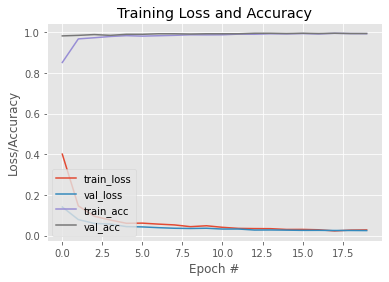

In [44]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("/content/drive/MyDrive/TARPfinal/model/plot.png")